In [ ]:
#default_exp utils

# Utility Functions

## utils from alphatims/alphapept

In [ ]:
#hide
from peptdeep import utils
__file__ = utils.__file__

In [ ]:
#export
import logging
import os
import sys
import tqdm

BASE_PATH = os.path.dirname(__file__)
LOG_PATH = os.path.join(BASE_PATH, "logs")

# from alphatims
def process_bar(iterator, len_iter):
    with tqdm.tqdm(total=len_iter) as bar:
        i = 0
        for i,iter in enumerate(iterator):
            yield iter
            bar.update()
        bar.update(len_iter-i-1)

def set_logger(
    *,
    log_file_name="",
    stream: bool = True,
    log_level: int = logging.INFO,
    overwrite: bool = False,
) -> str:
    """Set the log stream and file.
    All previously set handlers will be disabled with this command.
    Parameters
    ----------
    log_file_name : str, None
        The file name to where the log is written.
        Folders are automatically created if needed.
        This is relative to the current path. When an empty string is provided,
        a log is written to the AlphaTims "logs" folder with the name
        "log_yymmddhhmmss" (reversed timestamp year to seconds).
        If None, no log file is saved.
        Default is "".
    stream : bool
        If False, no log data is sent to stream.
        If True, all logging can be tracked with stdout stream.
        Default is True.
    log_level : int
        The logging level. Usable values are defined in Python's "logging"
        module.
        Default is logging.INFO.
    overwrite : bool
        If True, overwrite the log_file if one exists.
        If False, append to this log file.
        Default is False.
    Returns
    -------
    : str
        The file name to where the log is written.
    """
    import time
    root = logging.getLogger()
    formatter = logging.Formatter(
        '%(asctime)s> %(message)s', "%Y-%m-%d %H:%M:%S"
    )
    root.setLevel(log_level)
    while root.hasHandlers():
        root.removeHandler(root.handlers[0])
    if stream:
        stream_handler = logging.StreamHandler(sys.stdout)
        stream_handler.setLevel(log_level)
        stream_handler.setFormatter(formatter)
        root.addHandler(stream_handler)
    if log_file_name is not None:
        if log_file_name == "":
            if not os.path.exists(LOG_PATH):
                os.makedirs(LOG_PATH)
            log_file_name = LOG_PATH
        log_file_name = os.path.abspath(log_file_name)
        if os.path.isdir(log_file_name):
            current_time = time.localtime()
            current_time = "".join(
                [
                    f'{current_time.tm_year:04}',
                    f'{current_time.tm_mon:02}',
                    f'{current_time.tm_mday:02}',
                    f'{current_time.tm_hour:02}',
                    f'{current_time.tm_min:02}',
                    f'{current_time.tm_sec:02}',
                ]
            )
            log_file_name = os.path.join(
                log_file_name,
                f"log_{current_time}.txt"
            )
        directory = os.path.dirname(log_file_name)
        if not os.path.exists(directory):
            os.makedirs(directory)
        if overwrite:
            file_handler = logging.FileHandler(log_file_name, mode="w")
        else:
            file_handler = logging.FileHandler(log_file_name, mode="a")
        file_handler.setLevel(log_level)
        file_handler.setFormatter(formatter)
        root.addHandler(file_handler)
    return log_file_name
set_logger(log_file_name=None)

def show_platform_info() -> None:
    """Log all platform information.
    This is done in the following format:
        - [timestamp]> Platform information:
        - [timestamp]> system         - [...]
        - [timestamp]> release        - [...]
        - [timestamp]> version        - [...]
        - [timestamp]> machine        - [...]
        - [timestamp]> processor      - [...]
        - [timestamp]> cpu count      - [...]
        - [timestamp]> cpu frequency  - [...]
        - [timestamp]> ram            - [...]/[...] Gb (available/total)
    """
    import platform
    import psutil
    logging.info("Platform information:")
    logging.info(f"system        - {platform.system()}")
    logging.info(f"release       - {platform.release()}")
    if platform.system() == "Darwin":
        logging.info(f"version       - {platform.mac_ver()[0]}")
    else:
        logging.info(f"version       - {platform.version()}")
    logging.info(f"machine       - {platform.machine()}")
    logging.info(f"processor     - {platform.processor()}")
    logging.info(
        f"cpu count     - {psutil.cpu_count()}"
        # f" ({100 - psutil.cpu_percent()}% unused)"
    )
    logging.info(f"cpu frequency - {psutil.cpu_freq().current:.2f} Mhz")
    logging.info(
        f"ram           - "
        f"{psutil.virtual_memory().available/1024**3:.1f}/"
        f"{psutil.virtual_memory().total/1024**3:.1f} Gb "
        f"(available/total)"
    )
    logging.info("")


def show_python_info() -> None:
    """Log all Python information.
    This is done in the following format:
        - [timestamp]> Python information:
        - [timestamp]> alphatims          - [current_version]
        - [timestamp]> [required package] - [current_version]
        - ...
        - [timestamp]> [required package] - [current_version]
    """
    import importlib.metadata
    import platform
    import peptdeep
    module_versions = {
        "python": platform.python_version(),
        "peptdeep": peptdeep.__version__
    }
    requirements = importlib.metadata.requires("peptdeep")
    for requirement in requirements:
        parts = requirement.split(";")
        if len(parts) > 1:
            if "development" in parts[1]:
                continue
            if "win32" in parts[1]:
                continue
        module_name = parts[0].split("=")[0].split()[0]
        try:
            module_version = importlib.metadata.version(module_name)
        except importlib.metadata.PackageNotFoundError:
            module_version = ""
        module_versions[module_name] = module_version
    max_len = max(len(key) for key in module_versions)
    logging.info("Python information:")
    for key, value in sorted(module_versions.items()):
        logging.info(f"{key:<{max_len}} - {value}")
    logging.info("")

In [ ]:
#hide
show_python_info()
show_platform_info()

2022-02-08 23:47:54> Python information:
2022-02-08 23:47:54> biopython    - 1.78
2022-02-08 23:47:54> click        - 7.1.2
2022-02-08 23:47:54> matplotlib   - 3.3.3
2022-02-08 23:47:54> numba        - 0.54.0
2022-02-08 23:47:54> numpy        - 1.19.4
2022-02-08 23:47:54> pandas       - 1.3.5
2022-02-08 23:47:54> peptdeep     - 1.0.0
2022-02-08 23:47:54> python       - 3.8.3
2022-02-08 23:47:54> regex        - 2020.6.8
2022-02-08 23:47:54> scikit-learn - 0.24.2
2022-02-08 23:47:54> seaborn      - 0.11.1
2022-02-08 23:47:54> statsmodels  - 0.11.1
2022-02-08 23:47:54> streamlit    - 1.5.0
2022-02-08 23:47:54> torch        - 1.7.1
2022-02-08 23:47:54> tqdm         - 4.56.0
2022-02-08 23:47:54> transformers - 4.16.1
2022-02-08 23:47:54> 
2022-02-08 23:47:54> Platform information:
2022-02-08 23:47:54> system        - Darwin
2022-02-08 23:47:54> release       - 20.6.0
2022-02-08 23:47:54> version       - 10.16
2022-02-08 23:47:54> machine       - x86_64
2022-02-08 23:47:54> processor     - i

In [ ]:
#export
import pandas as pd
import itertools

def _flatten(list_of_lists):
    '''
    Flatten a list of lists
    '''
    return list(
        itertools.chain.from_iterable(list_of_lists)
    )

def explode_multiple_columns(df:pd.DataFrame, columns:list):
    try:
        return df.explode(columns)
    except ValueError:
        # pandas <= 1.2.x?
        logging.warn(f'pandas=={pd.__version__} cannot explode multiple columns')
        ret_df = df.explode(columns[0])
        for col in columns[1:]:
            ret_df[col] = _flatten(df[col].values)
        return ret_df


In [ ]:
#export
import pandas as pd
import numpy as np

def regional_sampling(psm_df:pd.DataFrame,
    target:str='rt_norm', n_train:int=1000,
    return_test_df:bool=False,
    random_state=1337,
)->pd.DataFrame:
    """ Divide `psm_df` into 10 bins and sample training values
    from each bins for model fine-tuning. The values are defined in the `target`
    column (`rt_norm` or `ccs`).

    Args:
        psm_df (pd.DataFrame): Dataframe of PSMs.
        target (str, optional): Target columns to sample.
            Defaults to 'rt_norm'.
        n_train (int, optional): The number of training PSMs
            to sample. Defaults to 1000.
        return_test_df (bool, optional): If also return `test_df`.
            `test_df` contains the PSMs that are not sampled.
            Defaults to False.
        random_state: `random_state` in `df.sample()`.

    Returns:
        pd.DataFrame: The sampled training PSMs (dataframe)
        [pd.DataFrame]: The not sampled PSMs (dataframe) for testing.
            Returned only if `return_test_df==True` in the arguments.
    """
    x = np.arange(0, 11)/10*psm_df[target].max()
    sub_n = n_train//(len(x)-1)
    df_list = []
    for i in range(len(x)-1):
        _df = psm_df[
            (psm_df[target]>=x[i])&(psm_df[target]<x[i+1])
        ]
        if len(_df) == 0: pass
        elif len(_df)//2 < sub_n:
            df_list.append(_df.sample(
                len(_df)//2,
                replace=False,
                random_state=random_state
            ))
        else:
            df_list.append(_df.sample(
                sub_n,
                replace=False,
                random_state=random_state
            ))
    if return_test_df:
        if len(df_list) == 0:
            return pd.DataFrame(), pd.DataFrame()
        train_df = pd.concat(df_list)
        test_df = psm_df.drop(train_df.index)
        return train_df, test_df
    else:
        if len(df_list) == 0:
            return pd.DataFrame()
        return pd.concat(df_list)

#legacy
uniform_sampling = regional_sampling

## Distance metrics

In [ ]:
#export
import torch


def pearson_correlation(x, y):
    return torch.cosine_similarity(
        x-x.mean(dim=1, keepdim=True),
        y-y.mean(dim=1, keepdim=True),
        dim = 1
    )

In [ ]:
#export
import numpy as np

def spectral_angle(cos):
    cos[cos>1] = 1
    return 1 - 2 * torch.arccos(cos) / np.pi

In [ ]:
#export
def spearman_correlation(x: torch.Tensor, y: torch.Tensor, device):
    """Compute correlation between 2 batches of 1-D tensors
    Args:
        x: Shape (Batch, n)
        y: Shape (Batch, n)
    """
    x_rank = _get_ranks(x, device)
    y_rank = _get_ranks(y, device)
    
    n = x.size(1)
    upper = 6 * torch.sum((x_rank - y_rank).pow(2), dim=1)
    down = n * (n ** 2 - 1.0)
    return 1.0 - (upper / down)



def _get_ranks(x: torch.Tensor, device) -> torch.Tensor:
    sorted_idx = x.argsort(dim=1)
    flat_idx = (
        sorted_idx+torch.arange(
            x.size(0), device=device
        ).unsqueeze(1)*x.size(1)
    ).flatten()
    ranks = torch.zeros_like(flat_idx)
    ranks[flat_idx] = torch.arange(
        x.size(1), device=device
    ).unsqueeze(0).repeat(x.size(0),1).flatten()
    ranks = ranks.reshape(x.size())
    ranks[x==0] = 0
    return ranks


In [ ]:
#export
from typing import Tuple, List
from alphabase.peptide.fragment import get_sliced_fragment_dataframe
import numpy as np


def add_ms2_similarity_columns(
    psm_df: pd.DataFrame,
    predict_intensity_df: pd.DataFrame,
    fragment_intensity_df: pd.DataFrame,
    charged_frag_types: List=None,
    metrics = ['PCC','COS','SA','SPC'],
    GPU = True,
    batch_size=10240,
    verbose=False,
    spc_top_k=0,
)->Tuple[pd.DataFrame, pd.DataFrame]:

    if torch.cuda.is_available() and GPU:
        device = torch.device('cuda')
    else:
        device = torch.device('cpu')

    if charged_frag_types is None or len(charged_frag_types)==0:
        charged_frag_types = fragment_intensity_df.columns.values

    _grouped = psm_df.groupby('nAA')

    if verbose:
        batch_tqdm = tqdm(_grouped)
    else:
        batch_tqdm = _grouped

    for met in metrics:
        psm_df[met] = 0

    for nAA, df_group in batch_tqdm:
        for i in range(0, len(df_group), batch_size):   
            batch_end = i+batch_size
            batch_df = df_group.iloc[i:batch_end,:]

            pred_intens = torch.tensor(
                get_sliced_fragment_dataframe(
                    predict_intensity_df, 
                    batch_df[
                        ['frag_start_idx','frag_end_idx']
                    ].values,
                    charged_frag_types
                ).values,
                dtype=torch.float32, device=device
            ).reshape(
                -1, (nAA-1)*len(charged_frag_types)
            )

            frag_intens = torch.tensor(
                get_sliced_fragment_dataframe(
                    fragment_intensity_df, 
                    batch_df[
                        ['frag_start_idx','frag_end_idx']
                    ].values,
                    charged_frag_types
                ).values,
                dtype=torch.float32, device=device
            ).reshape(
                -1, (nAA-1)*len(charged_frag_types)
            )

            if 'PCC' in metrics:
                psm_df.loc[batch_df.index,'PCC'] = pearson_correlation(
                    pred_intens, frag_intens
                ).cpu().detach().numpy()

            if 'COS' in metrics or 'SA' in metrics:
                cos = torch.cosine_similarity(
                    pred_intens, frag_intens, dim=1
                )
                psm_df.loc[
                    batch_df.index,'COS'
                ] = cos.cpu().detach().numpy()
                
                if 'SA' in metrics:
                    psm_df.loc[
                        batch_df.index,'SA'
                    ] = spectral_angle(
                        cos
                    ).cpu().detach().numpy()

            if 'SPC' in metrics:
                if spc_top_k > 1 and spc_top_k < frag_intens.size(1):
                    sorted_idx = frag_intens.argsort(dim=1, descending=True)
                    flat_idx = (
                        sorted_idx[:,:spc_top_k]+torch.arange(
                            frag_intens.size(0), dtype=torch.int,
                            device=device
                        ).unsqueeze(1)*frag_intens.size(1)
                    ).flatten()
                    pred_intens = pred_intens.flatten()[flat_idx].reshape(
                        sorted_idx.size(0),-1
                    )
                    frag_intens = frag_intens.flatten()[flat_idx].reshape(
                        sorted_idx.size(0),-1
                    )
                psm_df.loc[batch_df.index,'SPC'] = spearman_correlation(
                    pred_intens, frag_intens, device
                ).cpu().detach().numpy()

    metrics_describ = psm_df[metrics].describe()
    add_cutoff_metric(metrics_describ, psm_df, thres=0.9)
    add_cutoff_metric(metrics_describ, psm_df, thres=0.75)

    torch.cuda.empty_cache()
    return psm_df, metrics_describ


def add_cutoff_metric(
    metrics_describ, metrics_df, thres=0.9
):
    vals = []
    for col in metrics_describ.columns.values:
        vals.append(metrics_df.loc[metrics_df[col]>thres, col].count()/len(metrics_df))
    metrics_describ.loc[f'>{thres:.2f}'] = vals
    return metrics_describ


## Plotting functions

In [ ]:
#export
import statsmodels.api as sm
import seaborn as sns

def evaluate_linear_regression(
    df:pd.DataFrame, x='rt_pred', y='rt_norm', 
    ci=95, n_sample=10000000
):
    if len(df) > n_sample:
        df = df.sample(n_sample, replace=False)
    gls = sm.GLS(df[y], sm.add_constant(df[x]))
    res = gls.fit()
    summary = res.summary(alpha=1-ci/100.0)
    dfs = []
    results_as_html = summary.tables[0].as_html()
    dfs.append(pd.read_html(results_as_html, index_col=None)[0])
    results_as_html = summary.tables[1].as_html()
    dfs.append(pd.read_html(results_as_html, index_col=None)[0])
    summary = pd.concat(dfs, ignore_index=True)
    R_square = float(summary.loc[0,3])
    R = np.sqrt(R_square)
    n,b,w = summary.loc[[5,10,11],1].values.astype(float)
    return pd.DataFrame(
        dict(
            R_square=[R_square],R=[R],
            slope=[w],intercept=[b],test_num=[n]
        )
    )

def evaluate_linear_regression_plot(
    df:pd.DataFrame, x='rt_pred', y='rt_norm', 
    ci=95, n_sample=100000
):
    if len(df) > n_sample:
        df = df.sample(n_sample)
    alpha = 0.05
    if len(df) < 5000:
        alpha = 1
    elif len(df) < 50000:
        alpha = 5000.0/len(df)
    return sns.regplot(
        data=df, x=x, y=y, color='r', ci=ci, 
        scatter_kws={'s':0.05, 'alpha':alpha, 'color':'b'}
    )

<AxesSubplot:xlabel='rt_pred', ylabel='rt_norm'>

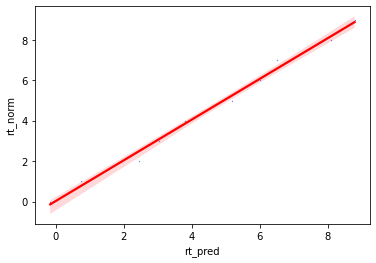

In [ ]:
#hide
import pandas as pd
import numpy as np
df = pd.DataFrame({'rt_norm':np.arange(10), 'rt_pred':np.arange(10)+np.random.normal(0,0.3,10)})
evaluate_linear_regression_plot(df)